In [1]:
#https://github.com/kmkolasinski/deep-learning-notes/blob/master/seminars/2019-03-Neural-Ordinary-Differential-Equations/0.Implementing_black_box_solver.ipynb

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

font = {'size'   : 20}
matplotlib.rc('font', **font)

In [2]:
def odeint(func, y0, t, solver):
    Δts = t[1:] - t[:-1]
    tk = t[0]
    yk = y0
    hist = [(tk, y0)]
    for Δt in Δts:
        yk = solver(Δt, tk, yk, func)
        tk = tk + Δt
        hist.append((tk, yk))
    return hist

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
tf.enable_eager_execution()
keras = tf.keras

def midpoint_step_keras(Δt, tk, hk, fun):
    k1 = fun([tk, hk])
    k2 = fun([tk + Δt, hk + Δt * k1])
    return hk + Δt * (k1 + k2) / 2

class Module(keras.Model):
    def __init__(self, nf):
        super(Module, self).__init__()        
        self.dense_1 = Dense(nf, activation='tanh')
        self.dense_2 = Dense(nf, activation='tanh')

    def call(self, inputs, **kwargs):
        t, x = inputs
        h = self.dense_1(x)
        return self.dense_2(h) - 0.25 * x

model = Module(2)


In [4]:
t_grid = np.linspace(0, 500., 2000)
h0 = tf.to_float([[1.0, -1.0]])
model = Module(2)
hist = odeint(model, h0, t_grid, midpoint_step_keras)

In [5]:
h_hist = np.array([h.numpy()[0, :] for t, h in hist])

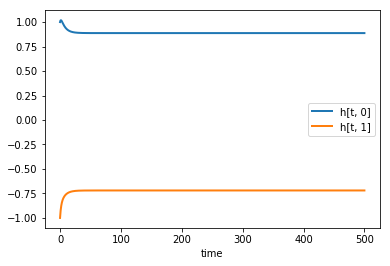

In [6]:
plt.plot(t_grid, h_hist[:, 0], label="h[t, 0]", lw=2)
plt.plot(t_grid, h_hist[:, 1], label="h[t, 1]", lw=2)
plt.xlabel("time")
plt.legend()